# Advanced Regression Assignment


## Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.



## Business Goal

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
#import 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy import stats
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = 100

In [2]:
#display dataframe
train_df = pd.read_csv('train.csv')
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#get details of the dataframe
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Missing value treatment

In [4]:
#percecntage of missing values in columns
missing_col =  round(100*(train_df.isnull().sum()/len(train_df.Id)), 2).sort_values(ascending=False)
missing_col[missing_col!=0]


PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageCond       5.55
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64

In [5]:
#PoolQC - NA in this column means there's no pool
#This means that majority of the houses has no pool

train_df["PoolQC"] = train_df["PoolQC"].fillna('None')

In [6]:
#MiscFeature - NA means there is no MiscFeature in house

train_df["MiscFeature"] = train_df["MiscFeature"].fillna('None')

In [7]:
#Alley - NA means there is no alley access to majority houses

train_df["Alley"] = train_df["Alley"].fillna('None')

In [8]:
#Fence - NA means the house doesnt have fences

train_df["Fence"] = train_df["Fence"].fillna('None')

In [9]:
#FireplaceQU - NA means the house doesnt have a FirePlaceQU

train_df['FireplaceQu'] = train_df['FireplaceQu'].fillna('None')

In [10]:
#LotFrontage -  Linear feet of street connected to property
#this will be similar to all houses in a neighborhood, we can fill the missing values by the median of that neighborhood

train_df['LotFrontage'] = train_df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [11]:
#GarageType, GarageFinish, GarageQual and GarageCond - Replacing missing data with None
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    train_df[col] = train_df[col].fillna('None')

In [12]:
#GarageYrBlt, GarageArea and GarageCars - Replacing missing data with 0 (Since No garage = no cars in such garage.)
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    train_df[col] = train_df[col].fillna(0)

In [13]:
#BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 - NaN means that there is no basement.
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    train_df[col] = train_df[col].fillna('None')

In [14]:
#BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath - missing values replaced with zero for having no basement

for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    train_df[col] = train_df[col].fillna(0)

In [15]:
#MasVnrArea and MasVnrType : NA means no masonry veneer for these houses, filling 0 for the area and None for the type.

train_df["MasVnrArea"] = train_df["MasVnrArea"].fillna(0)
train_df["MasVnrType"] = train_df["MasVnrType"].fillna("None")

In [16]:
missing_col =  train_df.isnull().sum()
missing_col[missing_col!=0]

Electrical    1
dtype: int64

In [17]:
train_df['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [18]:
#Electrical has only one missing value and we can impute the missing value with the mode.

train_df['Electrical'] = train_df['Electrical'].fillna(train_df['Electrical'].mode()[0])

### All the missing values have been treated and now the collumns PoolQC, MiscFeature, Alley, Fence have very less information value. Hence We can drop these columns. 

In [19]:
#drop the following colmns as they have very less information value
drop_col = ['PoolQC', 'MiscFeature', 'Alley', 'Fence']
train_df.drop(drop_col,axis =1,inplace=True)
train_df.shape

(1460, 77)

In [20]:
#Deleting the Id column 
train_df.drop('Id',axis =1,inplace=True)
train_df.shape

(1460, 76)

In [21]:
train_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

## Removing highly correlated features

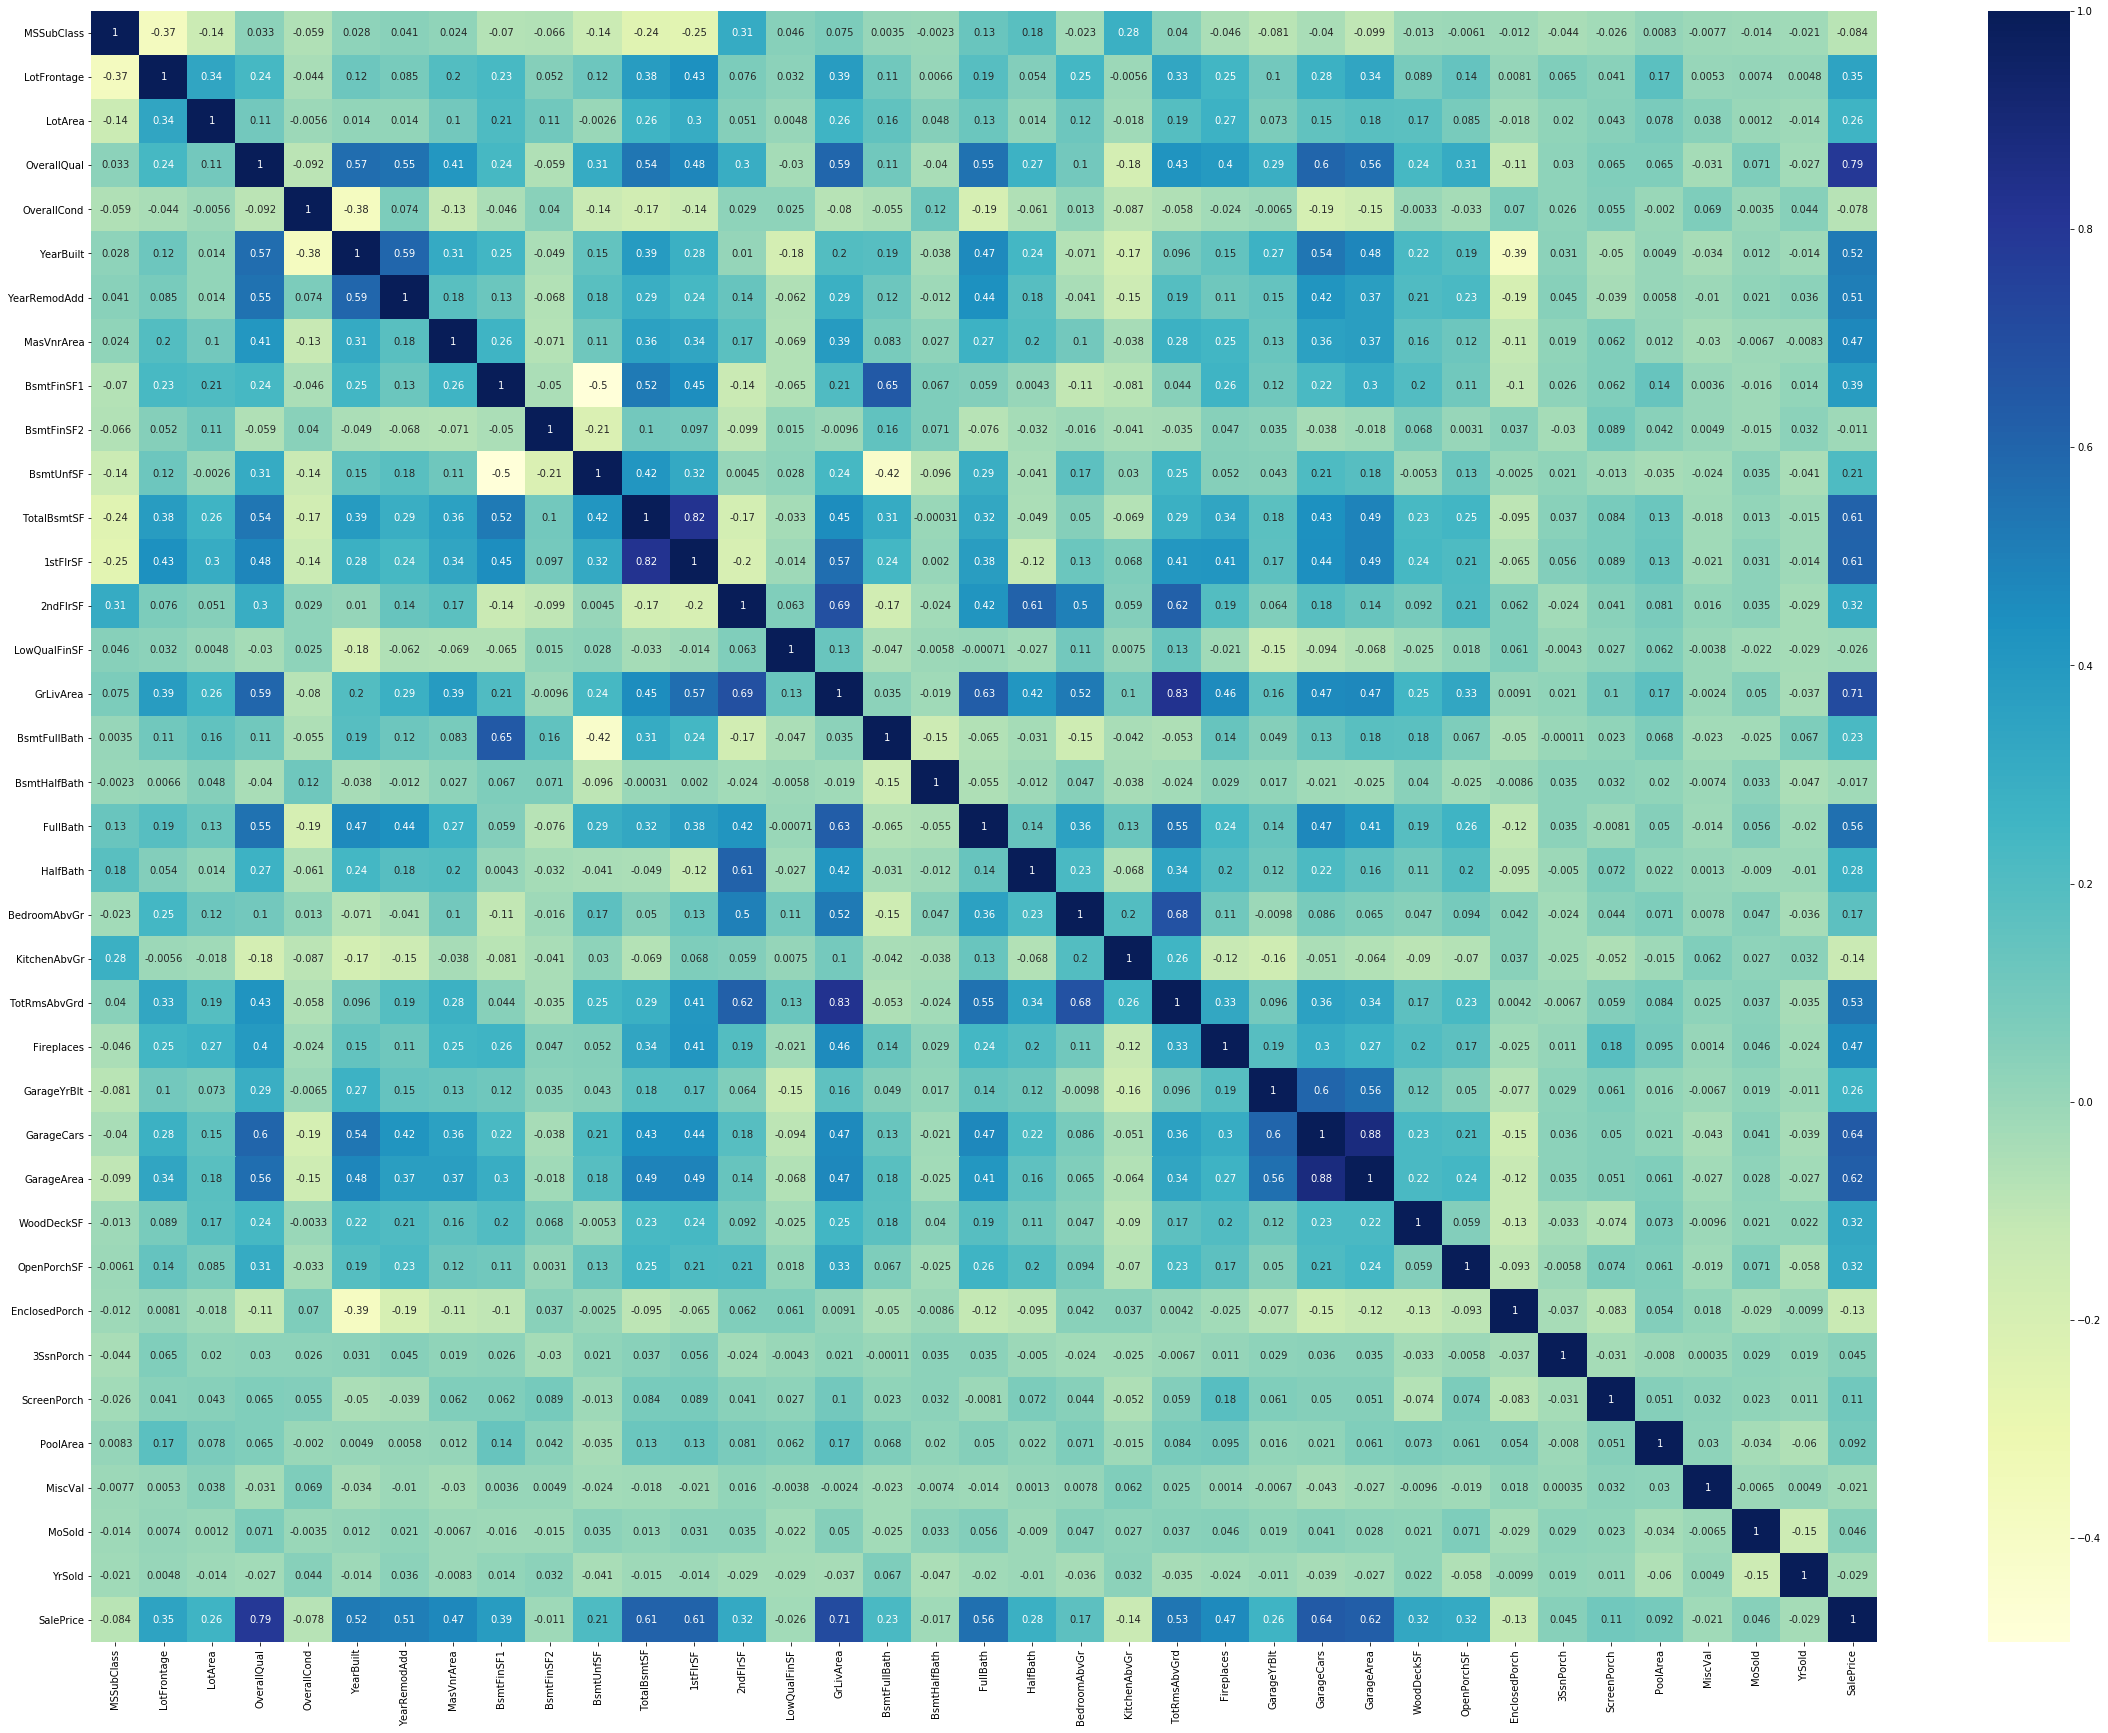

In [22]:
cor = train_df.corr()
plt.figure(figsize=(40,30))
# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [23]:
#Get all columns where corelation value is more than 0.8
m = (cor.mask(np.eye(len(cor),dtype=bool)).abs()>0.8).any()
m[(m)]

TotalBsmtSF     True
1stFlrSF        True
GrLivArea       True
TotRmsAbvGrd    True
GarageCars      True
GarageArea      True
dtype: bool

In [24]:
#drop these columns one by one and check the corelation value again
train_df.drop('TotalBsmtSF',axis=1,inplace=True)
cor = train_df.corr()
m = (cor.mask(np.eye(len(cor),dtype=bool)).abs()>0.8).any()
m[(m)]

GrLivArea       True
TotRmsAbvGrd    True
GarageCars      True
GarageArea      True
dtype: bool

In [25]:
train_df.drop('GrLivArea',axis=1,inplace=True)
cor = train_df.corr()
m = (cor.mask(np.eye(len(cor),dtype=bool)).abs()>0.8).any()
m[(m)]

GarageCars    True
GarageArea    True
dtype: bool

In [26]:
train_df.drop('GarageCars',axis=1,inplace=True)
cor = train_df.corr()
m = (cor.mask(np.eye(len(cor),dtype=bool)).abs()>0.8).any()
m[(m)]

Series([], dtype: bool)

In [27]:
train_df.shape

(1460, 73)

## Target Variable 

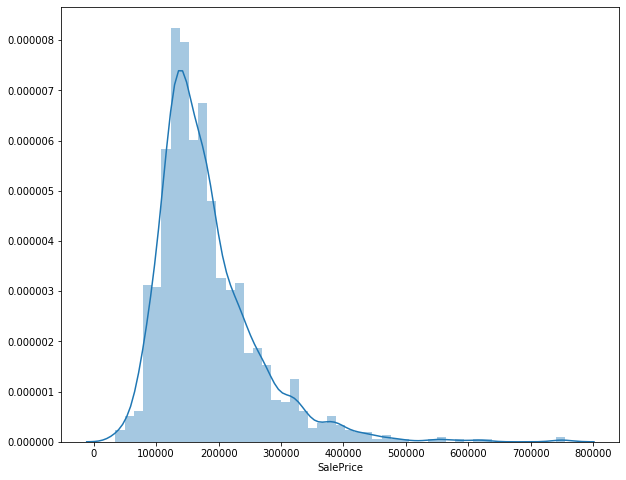

In [28]:
## Target variable 

plt.figure(figsize=(10,8))
sns.distplot(train_df['SalePrice'])

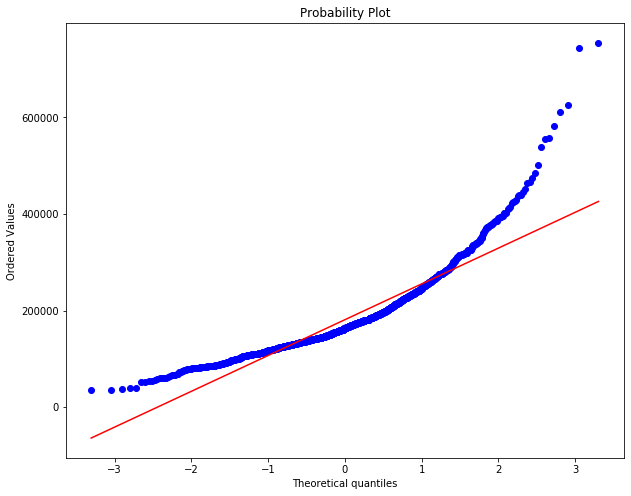

In [29]:
#Q-Q plot

fig = plt.figure(figsize = (10,8))
res = stats.probplot(train_df['SalePrice'], plot=plt)
plt.show()

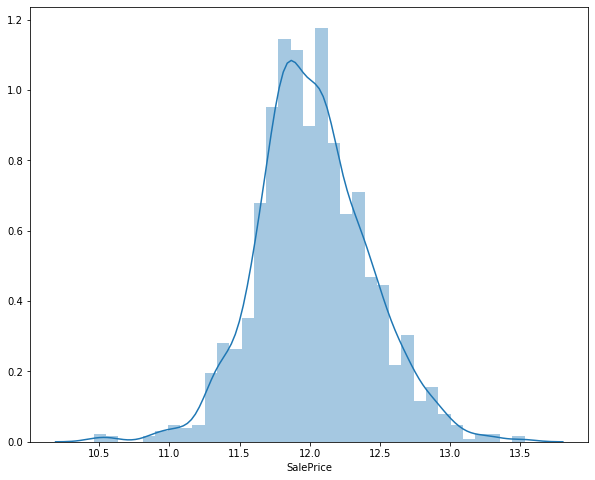

In [30]:
#Convert the salePrice to log scale
train_df["SalePrice"] = np.log1p(train_df["SalePrice"])
plt.figure(figsize=(10,8))
sns.distplot(train_df['SalePrice'])

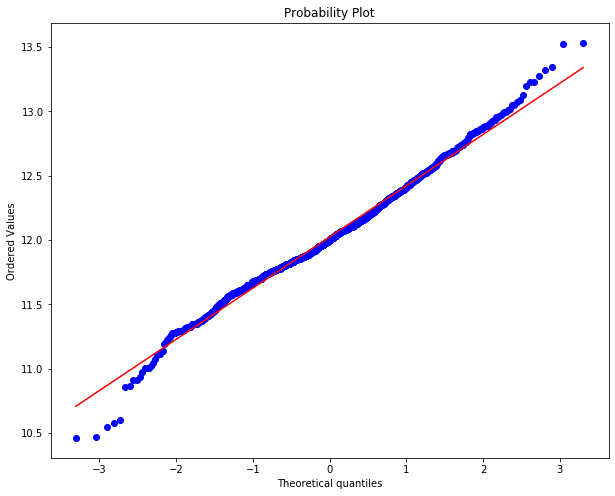

In [31]:
plt.figure(figsize = (10,8))
res = stats.probplot(train_df['SalePrice'], plot=plt)
plt.show()

In [32]:
#converting the following columns because it can be treated as categorical

train_df['MSSubClass'] = train_df['MSSubClass'].astype('str')  
train_df['OverallCond'] = train_df['OverallCond'].astype('str')
train_df['OverallQual'] = train_df['OverallQual'].astype('str')
train_df['YrSold'] = train_df['YrSold'].astype('str')
train_df['MoSold'] = train_df['MoSold'].astype('str')

In [33]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   object 
 16  OverallCond    1460 non-null   object 
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

## Derived feature

In [34]:
train_df['YrSold'] = train_df['YrSold'].astype('int64')

In [35]:
#Generate a column Age - age of the house when it was sold
    
train_df['Age'] = train_df['YrSold'] - train_df['YearBuilt']

train_df.shape

(1460, 74)

## Handling Numerical Features

In [36]:
#get all numerical features
numerical = list(train_df.dtypes[train_df.dtypes != "object"].index)
numerical

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'YrSold',
 'SalePrice',
 'Age']

In [37]:
#transform all the numerical features using log 1+x transformation
#using log 1+p because log p can give infinite values

train_df[numerical] = np.log1p(train_df[numerical])
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Age
0,60,RL,4.189655,9.042040,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7.602900,7.602900,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.283204,Gd,TA,PConc,Gd,TA,No,GLQ,6.561031,Unf,0.0,5.017280,GasA,Ex,Y,SBrkr,6.753438,6.751101,0.0,0.693147,0.000000,1.098612,0.693147,1.386294,0.693147,Gd,2.197225,Typ,0.000000,None,Attchd,7.602900,RFn,6.308098,TA,TA,Y,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.0,2,7.605392,WD,Normal,2.583824,1.791759
1,20,RL,4.394449,9.169623,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,7.589336,7.589336,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,6.886532,Unf,0.0,5.652489,GasA,Ex,Y,SBrkr,7.141245,0.000000,0.0,0.000000,0.693147,1.098612,0.000000,1.386294,0.693147,TA,1.945910,Typ,0.693147,TA,Attchd,7.589336,RFn,6.133398,TA,TA,Y,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.0,5,7.604894,WD,Normal,2.573300,3.465736
2,60,RL,4.234107,9.328212,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7.601902,7.602401,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.093750,Gd,TA,PConc,Gd,TA,Mn,GLQ,6.188264,Unf,0.0,6.075346,GasA,Ex,Y,SBrkr,6.825460,6.765039,0.0,0.693147,0.000000,1.098612,0.693147,1.386294,0.693147,Gd,1.945910,Typ,0.693147,TA,Attchd,7.601902,RFn,6.411818,TA,TA,Y,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.0,9,7.605392,WD,Normal,2.589054,2.079442
3,70,RL,4.110874,9.164401,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,7.557995,7.586296,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,5.379897,Unf,0.0,6.293419,GasA,Gd,Y,SBrkr,6.869014,6.629363,0.0,0.693147,0.000000,0.693147,0.000000,1.386294,0.693147,Gd,2.079442,Typ,0.693147,Gd,Detchd,7.600402,Unf,6.466145,TA,TA,Y,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.0,2,7.604396,WD,Abnorml,2.553297,4.521789
4,60,RL,4.442651,9.565284,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,7.601402,7.601402,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.860786,Gd,TA,PConc,Gd,TA,Av,GLQ,6.486161,Unf,0.0,6.196444,GasA,Ex,Y,SBrkr,7.044033,6.960348,0.0,0.693147,0.000000,1.098612,0.693147,1.609438,0.693147,Gd,2.302585,Typ,0.693147,TA,Attchd,7.601402,RFn,6.729824,TA,TA,Y,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.0,12,7.605392,WD,Normal,2.597433,2.197225


## Handling Categorical Values 

If any of the categories value count in the categorical variable is more than 95% then we can delete the column as there is no much information gain. 

In [38]:
#extract categorical
categorical = train_df.dtypes[train_df.dtypes == "object"].index
len(categorical)

43

In [39]:
categorical

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'MoSold', 'SaleType', 'SaleCondition'],
      dtype='object')

In [40]:
cat_above_90 =[]
for cat in categorical:
    vc = train_df[cat].value_counts(normalize=True)
    for i,v in enumerate(vc):
        if(vc[i]>0.90):
            print(cat, ":" , v)
            cat_above_90.append(cat)

Street : 0.9958904109589041
Utilities : 0.9993150684931507
LandSlope : 0.9465753424657535
Condition2 : 0.9897260273972602
RoofMatl : 0.9821917808219178
Heating : 0.9780821917808219
CentralAir : 0.934931506849315
Electrical : 0.9143835616438356
Functional : 0.9315068493150684
GarageCond : 0.9082191780821918
PavedDrive : 0.9178082191780822


In [41]:
train_df.drop(cat_above_90,axis = 1, inplace = True)

In [42]:
train_df.shape

(1460, 63)

In [43]:
#Converting the categorical to ordinal - ExterQual,ExterCond, BsmtQual, BsmtCond, BsmtExposure,
#HeatingQC, KitchenQual, FireplaceQu, GarageQual, GarageCond, 

# Excellent - 5
# Good - 4
# Typical/average - 3
# Fair/Minimum Exposure(for BsmtExposure) - 2
# Poor - 1
# None/No Exposure(for BsmtExposure) - 0

ordinal1 = ['ExterQual','ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual']

def give_num(val):
    if(val=='Ex'):return(5)
    if(val=='Gd'):return(4)
    if(val=='TA' or val=='Av'):return(3)
    if(val=='Fa' or val=='Mn'):return(2)
    if(val=='Po'):return(1)
    if(val=='None' or val=='No'):return(0)

for ordi in ordinal1:
    train_df[ordi] = train_df[ordi].apply(give_num)
    print("========",ordi,"========")
    train_df[ordi].astype('str')  
    print(train_df[ordi].value_counts(normalize=True))
    

    

======== ExterQual ========
3    0.620548
4    0.334247
5    0.035616
2    0.009589
Name: ExterQual, dtype: float64
======== ExterCond ========
3    0.878082
4    0.100000
2    0.019178
5    0.002055
1    0.000685
Name: ExterCond, dtype: float64
======== BsmtQual ========
3    0.444521
4    0.423288
5    0.082877
0    0.025342
2    0.023973
Name: BsmtQual, dtype: float64
======== BsmtCond ========
3    0.897945
4    0.044521
2    0.030822
0    0.025342
1    0.001370
Name: BsmtCond, dtype: float64
======== BsmtExposure ========
0    0.678767
3    0.151370
4    0.091781
2    0.078082
Name: BsmtExposure, dtype: float64
======== HeatingQC ========
5    0.507534
3    0.293151
4    0.165068
2    0.033562
1    0.000685
Name: HeatingQC, dtype: float64
======== KitchenQual ========
3    0.503425
4    0.401370
5    0.068493
2    0.026712
Name: KitchenQual, dtype: float64
======== FireplaceQu ========
0    0.472603
4    0.260274
3    0.214384
2    0.022603
5    0.016438
1    0.013699
Name: Firepl

In [44]:
#Converting the categorical to ordinal -'BsmtFinType1','BsmtFinType2' 

# Good Living Quarters  - 6
# Average Living Quarters - 5
# Below Average Living Quarters - 4
# Average Rec Roo - 3
# Low Quality - 2
# Unfinshed - 1
# No Basement - 0

ordinal2 = ['BsmtFinType1','BsmtFinType2']

def give_num(val):
    if(val=='GLQ'):return(6)
    if(val=='ALQ'):return(5)
    if(val=='BLQ'):return(4)
    if(val=='Rec'):return(3)
    if(val=='LwQ'):return(2)
    if(val=='Unf'):return(1)
    if(val=='None'):return(0)

    
for ordi in ordinal2:
    train_df[ordi] = train_df[ordi].apply(give_num)
    print("========",ordi,"========")
    print(train_df[ordi].value_counts(normalize=True))

    

======== BsmtFinType1 ========
1    0.294521
6    0.286301
5    0.150685
4    0.101370
3    0.091096
2    0.050685
0    0.025342
Name: BsmtFinType1, dtype: float64
======== BsmtFinType2 ========
1    0.860274
3    0.036986
2    0.031507
0    0.026027
4    0.022603
5    0.013014
6    0.009589
Name: BsmtFinType2, dtype: float64


In [45]:
#Lets rename the categories to aprropriate names for ease of understanding

def subclass(m):
    return "MSSubClass"+m

train_df['MSSubClass'] = train_df['MSSubClass'].apply(subclass)

train_df['MSSubClass'].value_counts(normalize=True)

MSSubClass20     0.367123
MSSubClass60     0.204795
MSSubClass50     0.098630
MSSubClass120    0.059589
MSSubClass30     0.047260
MSSubClass160    0.043151
MSSubClass70     0.041096
MSSubClass80     0.039726
MSSubClass90     0.035616
MSSubClass190    0.020548
MSSubClass85     0.013699
MSSubClass75     0.010959
MSSubClass45     0.008219
MSSubClass180    0.006849
MSSubClass40     0.002740
Name: MSSubClass, dtype: float64

In [46]:
len(categorical)-len(cat_above_90)

32

Creating dummy variables for 32 categorical variables will create hundreds of new variables and it will be tedoius analysing them. Hence the following steps are used to handle the categorical values --- 

1. Find the value_counts() for all the categorical variables
2. The if any category is less than 5%, then we'll combine the values into one category called "Others"


By doing this we'll be reducing the number of categories under the categorical variables and we can then use dummy encoding on these variables.


In [47]:
categorical2 = list(train_df.dtypes[train_df.dtypes == "object"].index)
len(categorical2)

21

In [48]:
categorical2

['MSSubClass',
 'MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'GarageType',
 'GarageFinish',
 'MoSold',
 'SaleType',
 'SaleCondition']

##### We will now combine the categories with smaller  frequencies into one category called as "Others". For this the ordinal columns and the year columns are not included. From the categorical2 list, the ordinal columns and year will be removed. 


In [49]:
ordinal_year = ['OverallQual', 'OverallCond','MoSold']
for i in ordinal_year:
    categorical2.remove(i)
    
categorical2

['MSSubClass',
 'MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'GarageType',
 'GarageFinish',
 'SaleType',
 'SaleCondition']

In [50]:
len(categorical2)

18

In [51]:
#combining smaller frequencies to 'others' category
for cat in categorical2:
    if(len(train_df[cat].value_counts())>2):
        print("======",cat,"==========")
        series = pd.value_counts(train_df[cat])
        mask = (series / series.sum() * 100).lt(5)
        train_df[cat] = np.where(train_df[cat].isin(series[mask].index),'Others', train_df[cat])
        print(train_df[cat].value_counts())  


====== MSSubClass ==========
MSSubClass20     536
Others           394
MSSubClass60     299
MSSubClass50     144
MSSubClass120     87
Name: MSSubClass, dtype: int64
====== MSZoning ==========
RL        1151
RM         218
Others      91
Name: MSZoning, dtype: int64
====== LotShape ==========
Reg       925
IR1       484
Others     51
Name: LotShape, dtype: int64
====== LandContour ==========
Lvl       1311
Others     149
Name: LandContour, dtype: int64
====== LotConfig ==========
Inside     1052
Corner      263
CulDSac      94
Others       51
Name: LotConfig, dtype: int64
====== Neighborhood ==========
Others     483
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
Name: Neighborhood, dtype: int64
====== Condition1 ==========
Norm      1260
Others     119
Feedr       81
Name: Condition1, dtype: int64
====== BldgType ==========
1Fam      1220
Others     126
TwnhsE     114
Name: BldgType, dtype: int64
==

In [52]:
train_df.shape

(1460, 63)

In [53]:
train_df.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Age
0,MSSubClass60,RL,4.189655,9.042040,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,7.602900,7.602900,Gable,VinylSd,VinylSd,BrkFace,5.283204,4,3,PConc,4,3,0,6,6.561031,1,0.0,5.017280,5,6.753438,6.751101,0.0,0.693147,0.000000,1.098612,0.693147,1.386294,0.693147,4,2.197225,0.000000,0,Attchd,7.602900,RFn,6.308098,3,0.000000,4.127134,0.0,0.0,0.0,0.0,0.0,2,7.605392,WD,Normal,2.583824,1.791759
1,MSSubClass20,RL,4.394449,9.169623,Reg,Lvl,Others,Others,Feedr,1Fam,1Story,6,8,7.589336,7.589336,Gable,MetalSd,MetalSd,None,0.000000,3,3,CBlock,4,3,4,5,6.886532,1,0.0,5.652489,5,7.141245,0.000000,0.0,0.000000,0.693147,1.098612,0.000000,1.386294,0.693147,3,1.945910,0.693147,3,Attchd,7.589336,RFn,6.133398,3,5.700444,0.000000,0.0,0.0,0.0,0.0,0.0,5,7.604894,WD,Normal,2.573300,3.465736
2,MSSubClass60,RL,4.234107,9.328212,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,7.601902,7.602401,Gable,VinylSd,VinylSd,BrkFace,5.093750,4,3,PConc,4,3,2,6,6.188264,1,0.0,6.075346,5,6.825460,6.765039,0.0,0.693147,0.000000,1.098612,0.693147,1.386294,0.693147,4,1.945910,0.693147,3,Attchd,7.601902,RFn,6.411818,3,0.000000,3.761200,0.0,0.0,0.0,0.0,0.0,9,7.605392,WD,Normal,2.589054,2.079442


In [54]:
#our final categorical features - dummy variables will be craeted for these
categorical2

['MSSubClass',
 'MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'GarageType',
 'GarageFinish',
 'SaleType',
 'SaleCondition']

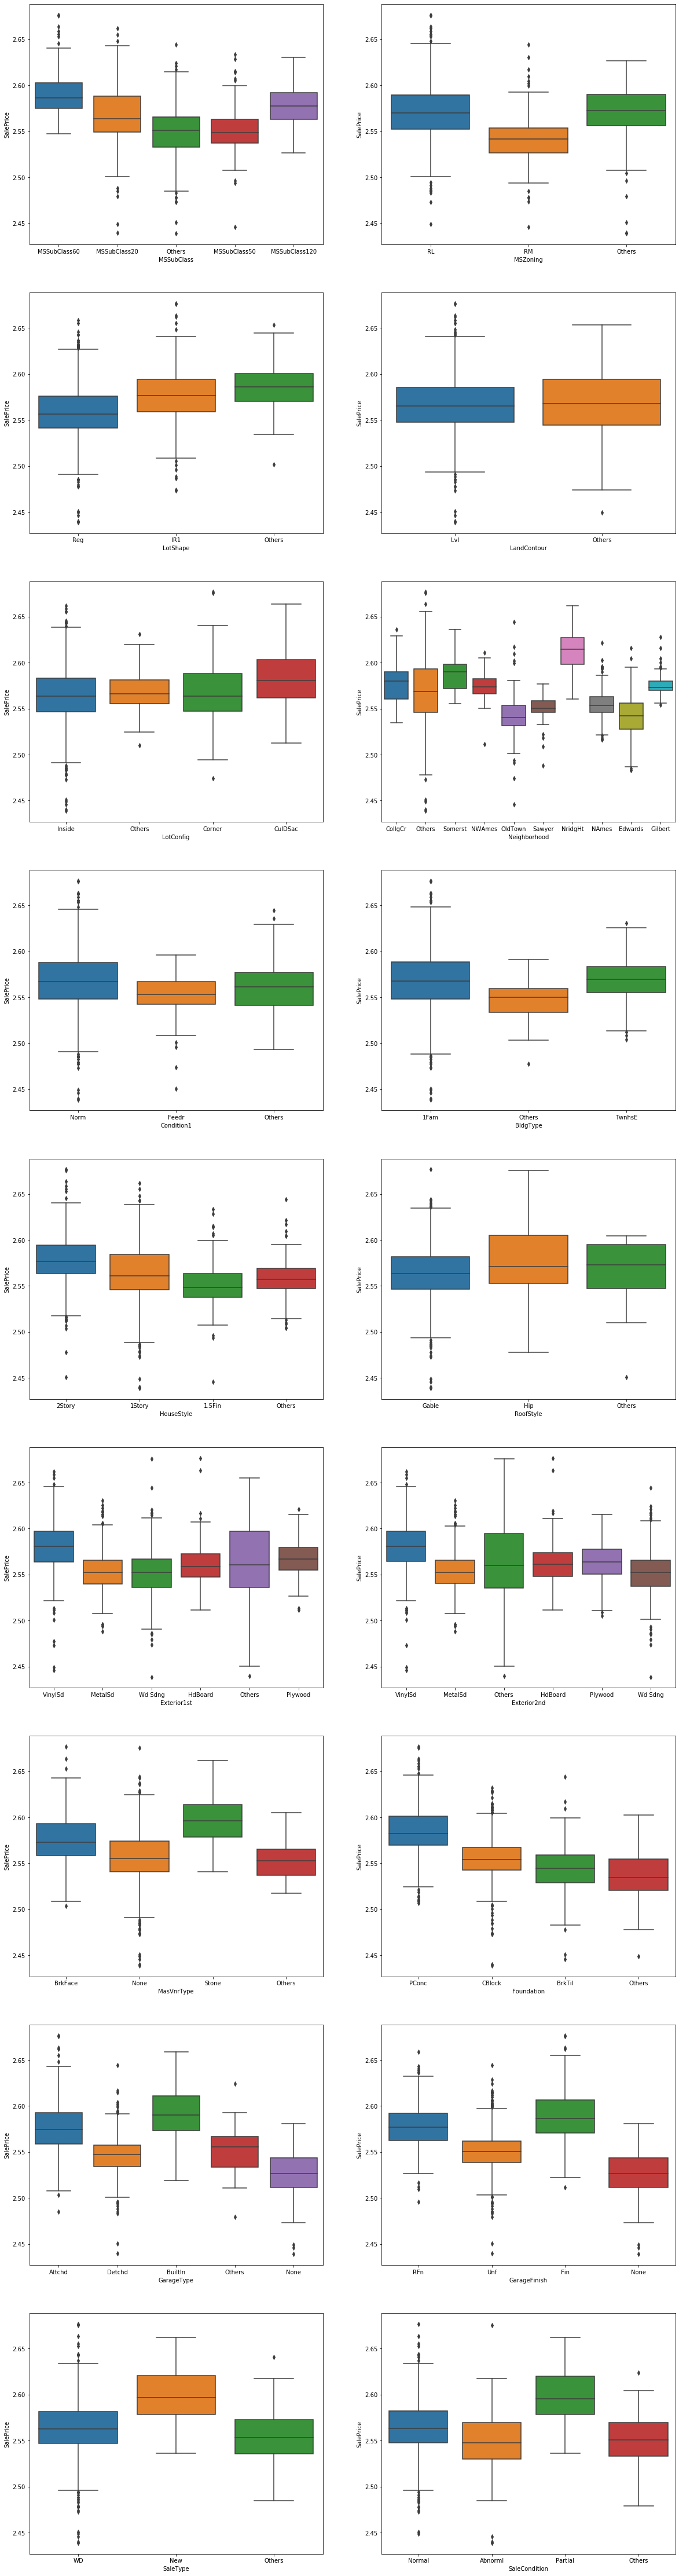

In [55]:
## Before going ahead lets just visualize these features


plt.figure(figsize=(20, 81))

plt.subplot(9,2,1)
sns.boxplot(x = 'MSSubClass', y = 'SalePrice', data = train_df)

plt.subplot(9,2,2)
sns.boxplot(x = 'MSZoning', y = 'SalePrice', data = train_df)

plt.subplot(9,2,3)
sns.boxplot(x = 'LotShape', y = 'SalePrice', data = train_df)

plt.subplot(9,2,4)
sns.boxplot(x = 'LandContour', y = 'SalePrice', data = train_df)

plt.subplot(9,2,5)
sns.boxplot(x = 'LotConfig', y = 'SalePrice', data = train_df)

plt.subplot(9,2,6)
sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data = train_df)

plt.subplot(9,2,7)
sns.boxplot(x = 'Condition1', y = 'SalePrice', data = train_df)

plt.subplot(9,2,8)
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = train_df)

plt.subplot(9,2,9)
sns.boxplot(x = 'HouseStyle', y = 'SalePrice', data = train_df)

plt.subplot(9,2,10)
sns.boxplot(x = 'RoofStyle', y = 'SalePrice', data = train_df)

plt.subplot(9,2,11)
sns.boxplot(x = 'Exterior1st', y = 'SalePrice', data = train_df)

plt.subplot(9,2,12)
sns.boxplot(x = 'Exterior2nd', y = 'SalePrice', data = train_df)

plt.subplot(9,2,13)
sns.boxplot(x = 'MasVnrType', y = 'SalePrice', data = train_df)

plt.subplot(9,2,14)
sns.boxplot(x = 'Foundation', y = 'SalePrice', data = train_df)

plt.subplot(9,2,15)
sns.boxplot(x = 'GarageType', y = 'SalePrice', data = train_df)

plt.subplot(9,2,16)
sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data = train_df)

plt.subplot(9,2,17)
sns.boxplot(x = 'SaleType', y = 'SalePrice', data = train_df)

plt.subplot(9,2,18)
sns.boxplot(x = 'SaleCondition', y = 'SalePrice', data = train_df)




In [56]:
#create dummies
cat_dummies = pd.get_dummies(train_df[categorical2],drop_first=True)
cat_dummies.head()

,MSSubClass_MSSubClass20,MSSubClass_MSSubClass50,MSSubClass_MSSubClass60,MSSubClass_Others,MSZoning_RL,MSZoning_RM,LotShape_Others,LotShape_Reg,LandContour_Others,LotConfig_CulDSac,LotConfig_Inside,LotConfig_Others,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Others,Neighborhood_Sawyer,Neighborhood_Somerst,Condition1_Norm,Condition1_Others,BldgType_Others,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Others,RoofStyle_Hip,RoofStyle_Others,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_None,MasVnrType_Others,MasVnrType_Stone,Foundation_CBlock,Foundation_Others,Foundation_PConc,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageType_Others,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,SaleType_Others,SaleType_WD,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0
1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0
2,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0
3,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
4,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0


In [57]:
train_df.drop(categorical2,axis=1, inplace=True)
train_df = pd.concat([train_df,cat_dummies],axis=1)
train_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Age,MSSubClass_MSSubClass20,MSSubClass_MSSubClass50,MSSubClass_MSSubClass60,MSSubClass_Others,MSZoning_RL,...,LandContour_Others,LotConfig_CulDSac,LotConfig_Inside,LotConfig_Others,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Others,Neighborhood_Sawyer,Neighborhood_Somerst,Condition1_Norm,Condition1_Others,BldgType_Others,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Others,RoofStyle_Hip,RoofStyle_Others,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_None,MasVnrType_Others,MasVnrType_Stone,Foundation_CBlock,Foundation_Others,Foundation_PConc,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageType_Others,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,SaleType_Others,SaleType_WD,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,4.189655,9.042040,7,5,7.602900,7.602900,5.283204,4,3,4,3,0,6,6.561031,1,0.0,5.017280,5,6.753438,6.751101,0.0,0.693147,0.000000,1.098612,0.693147,1.386294,0.693147,4,2.197225,0.000000,0,7.602900,6.308098,3,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.0,2,7.605392,2.583824,1.791759,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0
1,4.394449,9.169623,6,8,7.589336,7.589336,0.000000,3,3,4,3,4,5,6.886532,1,0.0,5.652489,5,7.141245,0.000000,0.0,0.000000,0.693147,1.098612,0.000000,1.386294,0.693147,3,1.945910,0.693147,3,7.589336,6.133398,3,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.0,5,7.604894,2.573300,3.465736,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0
2,4.234107,9.328212,7,5,7.601902,7.602401,5.093750,4,3,4,3,2,6,6.188264,1,0.0,6.075346,5,6.825460,6.765039,0.0,0.693147,0.000000,1.098612,0.693147,1.386294,0.693147,4,1.945910,0.693147,3,7.601902,6.411818,3,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.0,9,7.605392,2.589054,2.079442,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0
3,4.110874,9.164401,7,5,7.557995,7.586296,0.000000,3,3,3,4,0,5,5.379897,1,0.0,6.293419,4,6.869014,6.629363,0.0,0.693147,0.000000,0.693147,0.000000,1.386294,0.693147,4,2.079442,0.693147,4,7.600402,6.466145,3,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.0,2,7.604396,2.553297,4.521789,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
4,4.442651,9.565284,8,5,7.601402,7.601402,5.860786,4,3,4,3,3,6,6.486161,1,0.0,6.196444,5,7.044033,6.960348,0.0,0.693147,0.000000,1.098612,0.693147,1.609438,0.693147,4,2.302585,0.693147,3,7.601402,6.729824,3,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.0,12,7.605392,2.597433,2.197225,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0


In [58]:
Create X and y
y = train_df.pop('SalePrice')
X = train_df



In [59]:
#create train and test
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [60]:
X_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Age,MSSubClass_MSSubClass20,MSSubClass_MSSubClass50,MSSubClass_MSSubClass60,MSSubClass_Others,MSZoning_RL,MSZoning_RM,...,LandContour_Others,LotConfig_CulDSac,LotConfig_Inside,LotConfig_Others,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Others,Neighborhood_Sawyer,Neighborhood_Somerst,Condition1_Norm,Condition1_Others,BldgType_Others,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Others,RoofStyle_Hip,RoofStyle_Others,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_None,MasVnrType_Others,MasVnrType_Stone,Foundation_CBlock,Foundation_Others,Foundation_PConc,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageType_Others,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,SaleType_Others,SaleType_WD,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
210,4.219508,8.631414,5,6,7.563201,7.576097,0.000000,3,3,3,3,0,3,6.150603,1,0.0,5.983936,3,6.762730,0.000000,0.0,0.693147,0.0,0.693147,0.000000,1.098612,0.693147,3,1.791759,0.000000,0,0.000000,0.000000,0,0.000000,0.000000,4.574711,0.0,0.0,0.0,0.0,4,7.605392,4.430817,0,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0
318,4.510860,9.200391,7,5,7.597898,7.597898,5.549076,4,3,4,3,4,6,6.895683,1,0.0,5.888878,5,7.224753,7.150701,0.0,0.693147,0.0,1.098612,0.693147,1.609438,0.693147,4,2.302585,0.693147,3,7.597898,6.487684,3,5.831882,4.110874,4.976734,0.0,0.0,0.0,0.0,4,7.605890,2.833213,0,0,1,0,1,0,...,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0
239,3.970292,9.075894,6,4,7.573531,7.576097,0.000000,3,3,3,2,0,2,4.553877,1,0.0,6.464588,3,6.683361,6.536692,0.0,0.000000,0.0,0.693147,0.693147,1.386294,0.693147,3,2.079442,0.693147,4,7.575585,5.398163,3,0.000000,4.948760,0.000000,0.0,0.0,0.0,0.0,4,7.606387,4.189655,0,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0,0
986,4.094345,8.577535,6,8,7.555382,7.602900,0.000000,3,4,3,2,0,1,0.000000,1,0.0,6.186209,4,6.909753,6.453625,0.0,0.000000,0.0,0.693147,0.000000,1.098612,0.693147,4,1.791759,0.000000,0,7.576097,5.545177,2,5.978886,0.000000,0.000000,0.0,0.0,0.0,0.0,6,7.604396,4.574711,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0
1416,4.110874,9.336180,4,6,7.542213,7.576097,0.000000,3,3,3,3,0,1,0.000000,1,0.0,6.656727,4,7.128496,6.951772,0.0,0.000000,0.0,1.098612,0.000000,1.609438,1.098612,3,2.484907,0.000000,0,7.586804,6.329721,3,0.000000,0.000000,4.744932,0.0,0.0,0.0,0.0,4,7.606387,4.836282,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,1,0,0


# MODEL BUILDING

## 1. Model 1.1 -  With all the features - Ridge Regression

In [61]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    4.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [62]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.015466,0.003858,0.007096,0.003406,0.0001,{'alpha': 0.0001},0.900647,0.817709,0.841678,0.914672,0.898581,0.874657,0.037894,18,0.905195,0.921898,0.919029,0.903685,0.904915,0.910944,0.007841
1,0.012451,0.003374,0.002644,0.000929,0.001,{'alpha': 0.001},0.900607,0.816516,0.842579,0.915337,0.898044,0.874616,0.038170,19,0.904902,0.921788,0.918639,0.903381,0.904703,0.910682,0.007863
2,0.010411,0.001722,0.003943,0.003578,0.01,{'alpha': 0.01},0.900782,0.814818,0.844789,0.915998,0.896927,0.874663,0.038368,17,0.904342,0.921606,0.917874,0.902840,0.904355,0.910204,0.007895
3,0.012263,0.002734,0.002642,0.001397,0.05,{'alpha': 0.05},0.900219,0.813267,0.845982,0.916196,0.895584,0.874250,0.038489,22,0.903564,0.921278,0.916641,0.902005,0.903892,0.909476,0.007907
4,0.012168,0.003359,0.006394,0.003197,0.1,{'alpha': 0.1},0.900010,0.812863,0.846218,0.916235,0.895292,0.874123,0.038531,24,0.903300,0.921133,0.916183,0.901656,0.903714,0.909197,0.007912


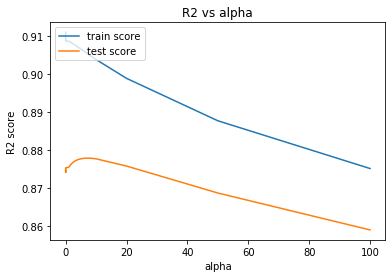

In [63]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 score')
plt.title("R2 vs alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [64]:
model_cv.best_params_

{'alpha': 7.0}

In [65]:
alpha = 7
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 9.22458624e-04,  6.61116267e-03,  5.16546802e-03,  3.44723647e-03,
        6.09381828e-04,  7.52431986e-04,  5.11655801e-04,  1.09947011e-04,
       -4.32667785e-04,  2.06059139e-03,  1.89913673e-04,  8.87153471e-04,
        3.99304657e-04,  5.20578687e-04,  2.49766831e-04, -1.86676545e-04,
       -2.21759843e-04,  1.21457892e-03,  2.09818643e-02,  1.58030476e-03,
        6.13367364e-04,  4.70213540e-03,  1.63484742e-03,  8.31934684e-03,
        5.57114942e-03,  2.47838550e-03, -1.54017066e-03,  2.19304848e-03,
        6.26217883e-03,  5.11055784e-04,  1.18351410e-03, -3.23775141e-03,
        4.69275994e-03,  1.96785753e-03,  2.45097089e-04,  2.49869774e-05,
        1.06617543e-04,  7.61007337e-04,  3.50814657e-04, -2.35705526e-03,
       -5.61543899e-04, -1.09368139e-05, -3.47886664e-05, -1.95244978e-03,
        1.50170217e-03, -1.54064940e-03, -3.92559290e-03, -2.75941395e-03,
        4.48529060e-03,  6.09261086e-04, -1.22315595e-04, -1.82988107e-04,
       -1.71329123e-03,  

In [66]:
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

print("TRAIN R2 SCORE:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("TEST R2 SCORE: ", r2_score(y_true=y_test,y_pred=y_test_pred))

TRAIN R2 SCORE: 0.9032371760186444
TEST R2 SCORE:  0.8789815714818843


In [67]:
from sklearn.metrics import mean_squared_error

print("TRAIN MSE SCORE:",mean_squared_error(y_true=y_train,y_pred=y_train_pred))
print("TEST MSE SCORE: ", mean_squared_error(y_true=y_test,y_pred=y_test_pred))

TRAIN MSE SCORE: 8.94976457755765e-05
TEST MSE SCORE:  0.00011764227205574255


In [68]:
from sklearn.metrics import mean_absolute_error

print("TRAIN MAE SCORE:",mean_absolute_error(y_true=y_train,y_pred=y_train_pred))
print("TEST MAE SCORE: ", mean_absolute_error(y_true=y_test,y_pred=y_test_pred))

TRAIN MAE SCORE: 0.0063412167215295455
TEST MAE SCORE:  0.007441097478204666


In [69]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Features','Coef']

ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Features,Coef
0,LotFrontage,2.221057
19,2ndFlrSF,0.020982
65,Condition1_Norm,0.008644
24,HalfBath,0.008319
2,OverallQual,0.006611
29,Fireplaces,0.006262
25,BedroomAbvGr,0.005571
3,OverallCond,0.005165
61,Neighborhood_OldTown,0.004727
22,BsmtHalfBath,0.004702


## 2. Model 1.2 - with all features - Lasso regression

In [70]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    4.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [71]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.030384,0.004213,0.004651,0.000804,0.0001,{'alpha': 0.0001},0.904874,0.819587,0.849669,0.917827,0.894752,0.877342,0.036882,1,0.893182,0.910521,0.904572,0.890114,0.893512,0.898380,0.007808
1,0.019018,0.001046,0.004601,0.000801,0.001,{'alpha': 0.001},0.859082,0.796308,0.804208,0.864870,0.856921,0.836278,0.029630,2,0.837731,0.858302,0.850632,0.838537,0.834128,0.843866,0.009111
2,0.017559,0.001046,0.004469,0.000455,0.01,{'alpha': 0.01},0.665279,0.627882,0.641534,0.695859,0.661911,0.658493,0.023146,3,0.664671,0.670157,0.669879,0.656355,0.652204,0.662653,0.007231
3,0.017200,0.001256,0.003948,0.000682,0.05,{'alpha': 0.05},-0.010150,-0.009369,-0.000109,-0.009607,-0.009598,-0.007767,0.003837,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.016413,0.000945,0.003857,0.000473,0.1,{'alpha': 0.1},-0.010150,-0.009369,-0.000109,-0.009607,-0.009598,-0.007767,0.003837,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


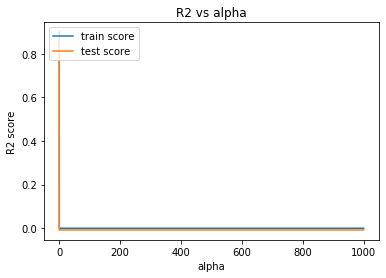

In [72]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 score')
plt.title("R2 vs alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [73]:
model_cv.best_params_

{'alpha': 0.0001}

In [74]:
alpha = 0.0001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([ 0.00000000e+00,  6.26865432e-03,  5.36129208e-03,  3.52647403e-03,
        0.00000000e+00,  0.00000000e+00,  2.49255127e-04,  1.82090295e-05,
        0.00000000e+00,  1.85940928e-03, -0.00000000e+00,  7.21935755e-04,
        3.82110180e-04,  6.71600522e-04,  0.00000000e+00, -0.00000000e+00,
       -2.20037457e-04,  1.25188081e-03,  2.67640201e-02,  1.75406627e-03,
        4.65055330e-04,  3.00828388e-03,  0.00000000e+00,  5.67342049e-03,
        4.28619488e-03,  5.09348944e-05, -0.00000000e+00,  1.96284233e-03,
        2.30395497e-03,  0.00000000e+00,  1.29666670e-03, -1.74523354e-03,
        3.47028378e-03,  0.00000000e+00,  2.32964776e-04,  2.15377396e-05,
       -0.00000000e+00,  4.46820582e-04,  3.20371754e-04, -2.24822304e-03,
       -4.42985442e-04, -2.33665652e-05, -0.00000000e+00, -3.20313283e-03,
        2.68428615e-03, -0.00000000e+00,  0.00000000e+00, -2.72503629e-04,
        4.15014852e-03, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -2.81583660e-04,  

In [75]:
y_train_pred_L = lasso.predict(X_train)
y_test_pred_L = lasso.predict(X_test)

print("TRAIN R2 SCORE:",r2_score(y_true=y_train,y_pred=y_train_pred_L))
print("TEST R2 SCORE: ", r2_score(y_true=y_test,y_pred=y_test_pred_L))

TRAIN R2 SCORE: 0.8960547785746354
TEST R2 SCORE:  0.8815844850272927


In [76]:
print("TRAIN MSE SCORE:",mean_squared_error(y_true=y_train,y_pred=y_train_pred_L))
print("TEST MSE SCORE: ", mean_squared_error(y_true=y_test,y_pred=y_test_pred_L))

TRAIN MSE SCORE: 9.614077209015342e-05
TEST MSE SCORE:  0.0001151119742556791


In [77]:
print("TRAIN MSE SCORE:",mean_absolute_error(y_true=y_train,y_pred=y_train_pred_L))
print("TEST MSE SCORE: ", mean_absolute_error(y_true=y_test,y_pred=y_test_pred_L))

TRAIN MSE SCORE: 0.006556550902497084
TEST MSE SCORE:  0.007235906274679323


In [78]:
model_parameter = list(lasso.coef_)
model_parameter.insert(0,lasso.intercept_)
cols = X_train.columns
cols.insert(0,'constant')
lasso_coef = pd.DataFrame(list(zip(cols,model_parameter)))
lasso_coef.columns = ['Feature','Coef']
lasso_coef.sort_values(by='Coef',ascending=False)


,Feature,Coef
0,LotFrontage,2.218486
19,2ndFlrSF,0.026764
2,OverallQual,0.006269
65,Condition1_Norm,0.006142
24,HalfBath,0.005673
...,...,...
32,GarageArea,-0.001745
40,MiscVal,-0.002248
94,GarageFinish_None,-0.002460
44,MSSubClass_MSSubClass20,-0.003203


# 3. Model 2.1 - RFE with Ridge Regression

### RFE using the Linear Regression estimator, the resultant columns of RFE will be fed to both Ridge and lasso

In [79]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)            
rfe = rfe.fit(X_train, y_train)

In [80]:
col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', '1stFlrSF',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'GarageYrBlt', 'YrSold', 'MSSubClass_MSSubClass60',
       'Neighborhood_Edwards', 'HouseStyle_2Story', 'MasVnrType_Others',
       'GarageType_None', 'GarageType_Others', 'GarageFinish_None'],
      dtype='object')

In [81]:
X_train_rfe1 = X_train[col]

In [82]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge1_rfe = Ridge()

# cross validation
folds = 5
model_cv1 = GridSearchCV(estimator = ridge1_rfe, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv1.fit(X_train_rfe1, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [83]:
cv_results = pd.DataFrame(model_cv1.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=400]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007291,0.002679,0.000404,0.000809,0.0001,{'alpha': 0.0001},0.891957,0.802611,0.805948,0.879717,0.877551,0.851557,0.038927,1,0.850849,0.871547,0.871826,0.853849,0.852469,0.860108,0.009502
1,0.004096,0.001710,0.000735,0.000645,0.001,{'alpha': 0.001},0.891716,0.802767,0.805794,0.879424,0.877490,0.851438,0.038824,2,0.850673,0.871298,0.871608,0.853703,0.852223,0.859901,0.009481
2,0.005546,0.001856,0.001931,0.001026,0.01,{'alpha': 0.01},0.891690,0.802592,0.805139,0.879649,0.876862,0.851186,0.038966,3,0.850287,0.870790,0.871199,0.853278,0.851738,0.859458,0.009467
3,0.004446,0.004362,0.003539,0.003424,0.05,{'alpha': 0.05},0.890035,0.800086,0.802013,0.878051,0.873786,0.848794,0.039351,4,0.847699,0.868213,0.868711,0.850615,0.849206,0.856889,0.009496
4,0.003128,0.003714,0.002920,0.002424,0.1,{'alpha': 0.1},0.887436,0.797122,0.798707,0.875146,0.870612,0.845805,0.039491,5,0.844663,0.865224,0.865801,0.847565,0.846249,0.853900,0.009527


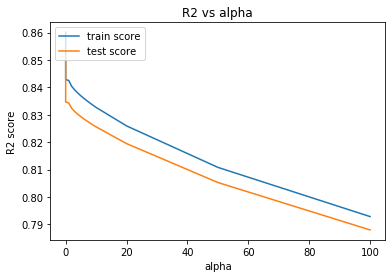

In [84]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 score')
plt.title("R2 vs alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [85]:
model_cv1.best_params_

{'alpha': 0.0001}

In [86]:
alpha = 0.0001
ridge1_rfe = Ridge(alpha=alpha)

ridge1_rfe.fit(X_train_rfe1, y_train)
ridge1_rfe.coef_



array([ 0.00865569,  0.00747501,  0.19163365,  0.36485487,  0.02376399,
        0.01038873,  0.00820896,  0.01353049,  0.00873981, -0.02948224,
        0.01540682,  0.04043143, -0.7264553 , -0.00284579, -0.00737144,
        0.00577602, -0.00778201,  0.14937086, -0.00736943,  0.14937086])

In [87]:
X_test_new = X_test[X_train_rfe1.columns]

y_train_pred = ridge1_rfe.predict(X_train_rfe1)
y_test_pred = ridge1_rfe.predict(X_test_new)

print("TRAIN R2 SCORE:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("TEST R2 SCORE: ", r2_score(y_true=y_test,y_pred=y_test_pred))

TRAIN R2 SCORE: 0.8592834391143332
TEST R2 SCORE:  0.8337147001570615


In [88]:
print("TRAIN MSE SCORE:",mean_squared_error(y_true=y_train,y_pred=y_train_pred))
print("TEST MSE SCORE: ", mean_squared_error(y_true=y_test,y_pred=y_test_pred))

TRAIN MSE SCORE: 0.00013015123373548234
TEST MSE SCORE:  0.00016164629406062187


In [89]:
print("TRAIN MAE SCORE:",mean_absolute_error(y_true=y_train,y_pred=y_train_pred))
print("TEST MAE SCORE: ", mean_absolute_error(y_true=y_test,y_pred=y_test_pred))

TRAIN MAE SCORE: 0.00791130986570612
TEST MAE SCORE:  0.00901537697669455


In [90]:
y_pred = ridge1_rfe.predict(X_test_new)

Text(0, 0.5, 'y_pred')

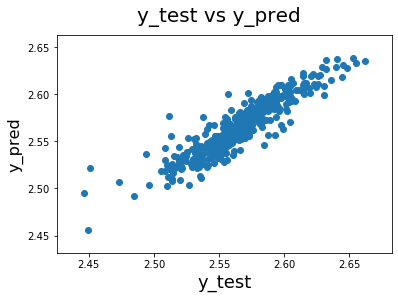

In [91]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                         
plt.ylabel('y_pred', fontsize=16)                          

In [92]:
model_parameter = list(ridge1_rfe.coef_)
model_parameter.insert(0,ridge1_rfe.intercept_)
cols = X_train_rfe1.columns
cols.insert(0,'constant')
ridge1_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge1_coef.columns = ['Features','Coef']

ridge1_coef['Abs_Coef'] = abs(ridge1_coef['Coef'])
ridge1_coef.sort_values(by='Abs_Coef',ascending=False).head(10)

,Features,Coef,Abs_Coef
0,LotArea,3.241017,3.241017
13,MSSubClass_MSSubClass60,-0.726455,0.726455
4,1stFlrSF,0.364855,0.364855
3,YearRemodAdd,0.191634,0.191634
18,GarageType_Others,0.149371,0.149371
12,YrSold,0.040431,0.040431
10,TotRmsAbvGrd,-0.029482,0.029482
5,BsmtFullBath,0.023764,0.023764
11,GarageYrBlt,0.015407,0.015407
8,HalfBath,0.013530,0.013530


In [93]:
#Double the value of alpha to check the change in top 10 parameters - alpha was 0.3 -- now 0.6

alpha = 0.0002
ridge2_rfe = Ridge(alpha=alpha)

ridge2_rfe.fit(X_train_rfe1, y_train)
ridge2_rfe.coef_

array([ 0.00865393,  0.00747652,  0.19255628,  0.36425027,  0.02377352,
        0.01037912,  0.00822204,  0.01354318,  0.00873312, -0.0295335 ,
        0.01541676,  0.03875089, -0.61424516, -0.00284181, -0.00738036,
        0.00577941, -0.00779078,  0.14300161, -0.00737782,  0.14300161])

In [94]:
X_test_new1 = X_test[X_train_rfe1.columns]

y_train_pred1 = ridge2_rfe.predict(X_train_rfe1)
y_test_pred1 = ridge2_rfe.predict(X_test_new1)

print("TRAIN R2 SCORE:",r2_score(y_true=y_train,y_pred=y_train_pred1))
print("TEST R2 SCORE: ", r2_score(y_true=y_test,y_pred=y_test_pred1))

TRAIN R2 SCORE: 0.8592595884905672
TEST R2 SCORE:  0.8337235493015767


In [95]:
model_parameter = list(ridge2_rfe.coef_)
model_parameter.insert(0,ridge2_rfe.intercept_)
cols = X_train_rfe1.columns
cols.insert(0,'constant')
ridge2_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge2_coef.columns = ['Features','Coef']

ridge2_coef['Abs_Coef'] = abs(ridge2_coef['Coef'])
ridge2_coef.sort_values(by='Abs_Coef',ascending=False).head(10)

,Features,Coef,Abs_Coef
0,LotArea,2.397920,2.397920
13,MSSubClass_MSSubClass60,-0.614245,0.614245
4,1stFlrSF,0.364250,0.364250
3,YearRemodAdd,0.192556,0.192556
18,GarageType_Others,0.143002,0.143002
12,YrSold,0.038751,0.038751
10,TotRmsAbvGrd,-0.029533,0.029533
5,BsmtFullBath,0.023774,0.023774
11,GarageYrBlt,0.015417,0.015417
8,HalfBath,0.013543,0.013543


In [96]:
#Top 5 features

ridge1_coef['Abs_Coef'] = abs(ridge1_coef['Coef'])
ridge1_coef.sort_values(by='Abs_Coef',ascending=False).head()

,Features,Coef,Abs_Coef
0,LotArea,3.241017,3.241017
13,MSSubClass_MSSubClass60,-0.726455,0.726455
4,1stFlrSF,0.364855,0.364855
3,YearRemodAdd,0.191634,0.191634
18,GarageType_Others,0.149371,0.149371


In [97]:
drop_col = ['LotArea','MSSubClass_MSSubClass60','1stFlrSF','YearRemodAdd','GarageType_Others']

X_train_rfe2_new = X_train_rfe1.drop(drop_col,axis=1)

In [98]:
ridge2_rfe.fit(X_train_rfe2_new, y_train)
ridge2_rfe.coef_

array([ 0.00987265,  0.26786651,  0.01624325,  0.01199913,  0.01963342,
        0.00819742, -0.03285031,  0.04074001,  0.10846453, -0.61233277,
       -0.00700375, -0.00743006, -0.0049089 ,  0.40608361,  0.40608361])

In [99]:
X_test_new2 = X_test[X_train_rfe2_new.columns]

y_train_pred = ridge2_rfe.predict(X_train_rfe2_new)
y_test_pred = ridge2_rfe.predict(X_test_new2)

print("TRAIN R2 SCORE:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("TEST R2 SCORE: ", r2_score(y_true=y_test,y_pred=y_test_pred))

TRAIN R2 SCORE: 0.8002063203744095
TEST R2 SCORE:  0.7866755276622039


In [100]:
model_parameter = list(ridge2_rfe.coef_)
model_parameter.insert(0,ridge2_rfe.intercept_)
cols = X_train_rfe2_new.columns
cols.insert(0,'constant')
ridge2_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge2_coef.columns = ['Features','Coef']

ridge2_coef['Abs_Coef'] = abs(ridge2_coef['Coef'])
ridge2_coef.sort_values(by='Abs_Coef',ascending=False).head()

,Features,Coef,Abs_Coef
0,OverallQual,4.227692,4.227692
10,Neighborhood_Edwards,-0.612333,0.612333
14,GarageFinish_None,0.406084,0.406084
2,BsmtFullBath,0.267867,0.267867
9,YrSold,0.108465,0.108465


## 4. Model 2.2 - RFE with Lasso Regression

In [101]:
# list of alphas to tune
params = {'alpha': [0.0001,0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso1_rfe = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso1_rfe, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe1, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [102]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=400]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005467,0.001951,0.000399,0.000489,0.0001,{'alpha': 0.0001},0.869086,0.784749,0.772719,0.853987,0.847818,0.825672,0.039130,1,0.824752,0.845238,0.846672,0.827887,0.827156,0.834341,0.009550
1,0.006518,0.001552,0.001648,0.000867,0.001,{'alpha': 0.001},0.796498,0.736252,0.722911,0.788066,0.793583,0.767462,0.031333,2,0.763739,0.781098,0.787232,0.768504,0.764493,0.773013,0.009450
2,0.003406,0.001979,0.001131,0.001334,0.01,{'alpha': 0.01},0.607588,0.572717,0.577130,0.623545,0.598973,0.595990,0.018974,3,0.598660,0.603236,0.610577,0.595658,0.587657,0.599158,0.007639
3,0.006492,0.002908,0.002237,0.001946,0.05,{'alpha': 0.05},-0.010150,-0.009369,-0.000109,-0.009607,-0.009598,-0.007767,0.003837,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.007420,0.002373,0.001405,0.000804,0.1,{'alpha': 0.1},-0.010150,-0.009369,-0.000109,-0.009607,-0.009598,-0.007767,0.003837,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


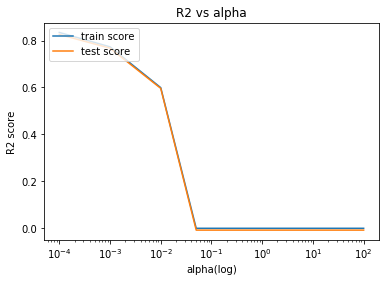

In [103]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha(log)')
plt.ylabel('R2 score')
plt.xscale('log')
plt.title("R2 vs alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [104]:
model_cv.best_params_

{'alpha': 0.0001}

In [105]:
alpha = 0.0001
lasso1_rfe = Lasso(alpha=alpha)

lasso1_rfe.fit(X_train_rfe1, y_train)
lasso1_rfe.coef_


array([ 0.0066747 ,  0.01038275,  0.        ,  0.        ,  0.0256957 ,
        0.0107485 ,  0.00490695,  0.01876054,  0.01014547, -0.01421756,
        0.0029526 ,  0.00117897, -0.        ,  0.00308078, -0.00527007,
        0.0031615 , -0.        , -0.        , -0.00434561, -0.        ])

In [106]:
X_test_new = X_test[X_train_rfe1.columns]

y_train_pred = lasso1_rfe.predict(X_train_rfe1)
y_test_pred = lasso1_rfe.predict(X_test_new)

print("TRAIN R2 SCORE:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("TEST R2 SCORE: ", r2_score(y_true=y_test,y_pred=y_test_pred))

TRAIN R2 SCORE: 0.8334908270093198
TEST R2 SCORE:  0.8327041841148465


Text(0, 0.5, 'y_pred')

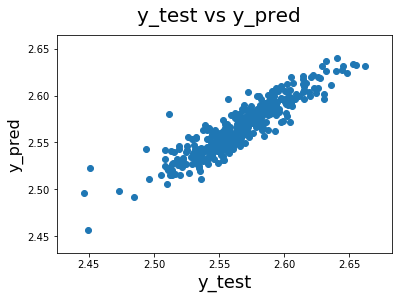

In [107]:

# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                         
plt.ylabel('y_pred', fontsize=16)                          

In [108]:
model_parameter = list(lasso1_rfe.coef_)
model_parameter.insert(0,lasso1_rfe.intercept_)
cols = X_train_rfe1.columns
cols.insert(0,'constant')
lasso1_coef = pd.DataFrame(list(zip(cols,model_parameter)))
lasso1_coef.columns = ['Features','Coef']

lasso1_coef['Abs_Coef'] = abs(lasso1_coef['Coef'])
lasso1_coef.sort_values(by='Abs_Coef',ascending=False).head(10)

,Features,Coef,Abs_Coef
0,LotArea,2.233501,2.233501
5,BsmtFullBath,0.025696,0.025696
8,HalfBath,0.018761,0.018761
10,TotRmsAbvGrd,-0.014218,0.014218
6,BsmtHalfBath,0.010749,0.010749
2,YearBuilt,0.010383,0.010383
9,KitchenAbvGr,0.010145,0.010145
1,OverallQual,0.006675,0.006675
15,HouseStyle_2Story,-0.005270,0.005270
7,FullBath,0.004907,0.004907


In [109]:
#Double the value of alpha to check the change in top 10 parameters - alpha was 0.0001 -- now 0.0002

alpha = 0.0002
lasso2_rfe = Lasso(alpha=alpha)

lasso2_rfe.fit(X_train_rfe1, y_train)
lasso2_rfe.coef_

array([ 0.00678493,  0.01130111,  0.        ,  0.        ,  0.02425249,
        0.00928596,  0.00051866,  0.01484192,  0.00925835, -0.        ,
        0.        ,  0.00126539, -0.        ,  0.00425129, -0.00347906,
        0.00245911, -0.        , -0.        , -0.        , -0.        ])

In [110]:
X_test_new1 = X_test[X_train_rfe1.columns]

y_train_pred = lasso2_rfe.predict(X_train_rfe1)
y_test_pred = lasso2_rfe.predict(X_test_new1)

print("TRAIN R2 SCORE:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("TEST R2 SCORE: ", r2_score(y_true=y_test,y_pred=y_test_pred))

TRAIN R2 SCORE: 0.8230565320162482
TEST R2 SCORE:  0.8299959268657604


In [111]:
model_parameter = list(lasso2_rfe.coef_)
model_parameter.insert(0,lasso2_rfe.intercept_)
cols = X_train_rfe1.columns
cols.insert(0,'constant')
lasso2_coef = pd.DataFrame(list(zip(cols,model_parameter)))
lasso2_coef.columns = ['Features','Coef']

lasso2_coef['Abs_Coef'] = abs(lasso2_coef['Coef'])
lasso2_coef.sort_values(by='Abs_Coef',ascending=False).head(10)

,Features,Coef,Abs_Coef
0,LotArea,2.236325,2.236325
5,BsmtFullBath,0.024252,0.024252
8,HalfBath,0.014842,0.014842
2,YearBuilt,0.011301,0.011301
6,BsmtHalfBath,0.009286,0.009286
9,KitchenAbvGr,0.009258,0.009258
1,OverallQual,0.006785,0.006785
14,Neighborhood_Edwards,0.004251,0.004251
15,HouseStyle_2Story,-0.003479,0.003479
16,MasVnrType_Others,0.002459,0.002459


In [112]:
#Top 5 features

lasso1_coef['Abs_Coef'] = abs(lasso1_coef['Coef'])
lasso1_coef.sort_values(by='Abs_Coef',ascending=False).head()

,Features,Coef,Abs_Coef
0,LotArea,2.233501,2.233501
5,BsmtFullBath,0.025696,0.025696
8,HalfBath,0.018761,0.018761
10,TotRmsAbvGrd,-0.014218,0.014218
6,BsmtHalfBath,0.010749,0.010749


In [113]:
drop_col = ['LotArea','BsmtFullBath','HalfBath','TotRmsAbvGrd','BsmtHalfBath']

X_train_rfe1_new = X_train_rfe1.drop(drop_col,axis=1)


In [114]:
lasso1_rfe.fit(X_train_rfe1_new,y_train)
lasso1_rfe.coef_

array([ 0.01058467,  0.        ,  0.        ,  0.03663823,  0.00906784,
       -0.01412307,  0.00124986, -0.        ,  0.01125437, -0.00431667,
        0.0054168 , -0.        , -0.        , -0.00389359, -0.        ])

In [115]:
X_test_new1 = X_test[X_train_rfe1_new.columns]

y_train_pred = lasso1_rfe.predict(X_train_rfe1_new)
y_test_pred = lasso1_rfe.predict(X_test_new1)

print("TRAIN R2 SCORE:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("TEST R2 SCORE: ", r2_score(y_true=y_test,y_pred=y_test_pred))

TRAIN R2 SCORE: 0.799256705789797
TEST R2 SCORE:  0.8050367313964302


In [116]:
model_parameter = list(lasso2_rfe.coef_)
model_parameter.insert(0,lasso2_rfe.intercept_)
cols = X_train_rfe1_new.columns
cols.insert(0,'constant')
lasso2_coef = pd.DataFrame(list(zip(cols,model_parameter)))
lasso2_coef.columns = ['Features','Coef']

lasso2_coef['Abs_Coef'] = abs(lasso2_coef['Coef'])
lasso2_coef.sort_values(by='Abs_Coef',ascending=False).head()

,Features,Coef,Abs_Coef
0,OverallQual,2.236325,2.236325
5,KitchenAbvGr,0.024252,0.024252
8,MSSubClass_MSSubClass60,0.014842,0.014842
2,YearRemodAdd,0.011301,0.011301
6,GarageYrBlt,0.009286,0.009286
